# Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV

In [2]:
df = pd.read_csv(open('survey_results_public.csv'))
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


# Keep only the columns we need

In [3]:
df = df[["EdLevel", "Country", "Employment", "YearsCodePro", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,EdLevel,Country,Employment,YearsCodePro,Salary
0,"Secondary school (e.g. American high school, G...",Slovakia,"Independent contractor, freelancer, or self-em...",NaN,62268.0
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Netherlands,"Student, full-time",NaN,NaN
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Russian Federation,"Student, full-time",NaN,NaN
3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Austria,Employed full-time,NaN,NaN
4,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United Kingdom of Great Britain and Northern I...,"Independent contractor, freelancer, or self-em...",10,NaN


# Remove all the rows that don't contain a salary

In [4]:
df = df[df["Salary"].notnull()]
df.head()

,EdLevel,Country,Employment,YearsCodePro,Salary
0,"Secondary school (e.g. American high school, G...",Slovakia,"Independent contractor, freelancer, or self-em...",NaN,62268.0
9,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Sweden,Employed full-time,4,51552.0
11,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Spain,Employed full-time,5,46482.0
12,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Germany,Employed full-time,6,77290.0
16,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Turkey,Employed full-time,2,17748.0


# Display the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EdLevel       46823 non-null  object 
 1   Country       46844 non-null  object 
 2   Employment    46831 non-null  object 
 3   YearsCodePro  46391 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


# Display the count of rows that are not numbers

In [6]:
df.isnull().sum()

EdLevel          21
Country           0
Employment       13
YearsCodePro    453
Salary            0
dtype: int64

# Remove empty and NaN data

In [7]:
df = df.dropna()
df.isnull().sum()

EdLevel         0
Country         0
Employment      0
YearsCodePro    0
Salary          0
dtype: int64

# Keep rows only where the person was employed full time

In [8]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EdLevel       40211 non-null  object 
 1   Country       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


# Show the rows per country

In [9]:
df['Country'].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

# Define a function to remove the countries up to a certain cutoff value

In [10]:
def cut_categories(categories, cutoff):
    cat_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            cat_map[categories.index[i]] = categories.index[i]
        else:
            cat_map[categories.index[i]] = 'Other'
    return cat_map

# Use the function above to apply the cutoff to the countries

In [11]:
countries_map = cut_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(countries_map)
df.Country.value_counts()

Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

# Inspect the salary range

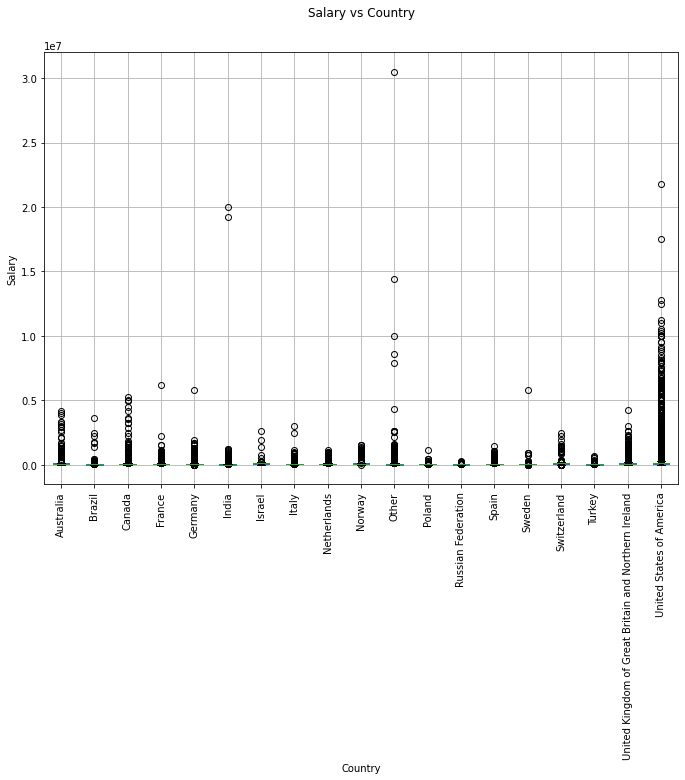

In [12]:
fix, ax = plt.subplots(1, 1, figsize = (11,8))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle('Salary vs Country')
plt.xticks(rotation = 90)
plt.title('')
plt.ylabel('Salary')
plt.show()

# Remove outliers

In [13]:
df = df[df["Salary"] <= 200000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

# Inspect the salary range

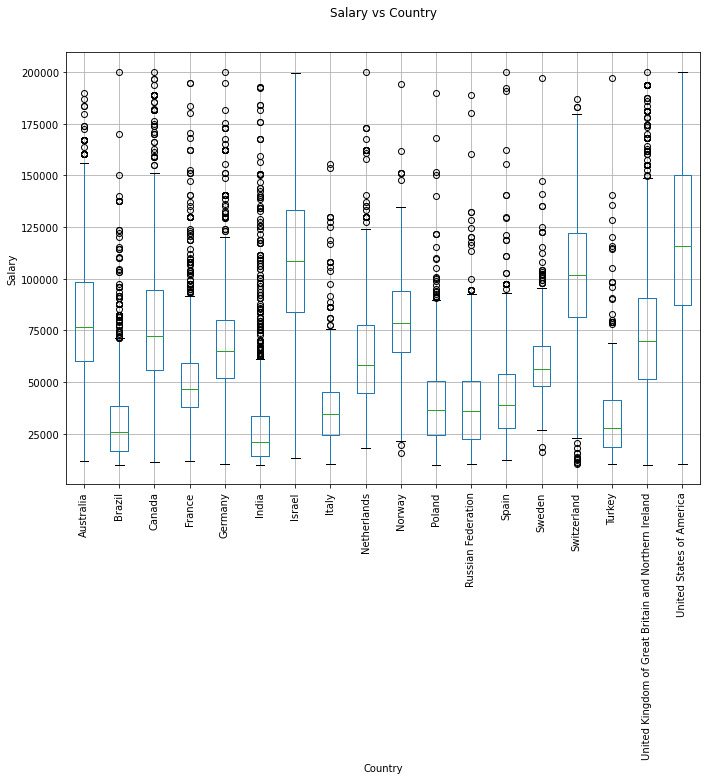

In [14]:
fix, ax = plt.subplots(1, 1, figsize = (11,8))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle('Salary vs Country')
plt.xticks(rotation = 90)
plt.title('')
plt.ylabel('Salary')
plt.show()

# Inspect the YearsCodePro

In [15]:
df["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '26', '34', '11', '25',
       '24', '22', '13', '9', '7', '39', '20', '27', '23', '30', '19',
       '35', '33', '43', '40', '29', '38', '31', '42', '28', '46', '32',
       '36', '37', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

# Clean the YearsCodePro

In [16]:
def clean_years(x):    
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 50
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_years)

# Inspect the EdLevel

In [17]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

# Clean the EdLevel

In [18]:
def clean_education(x):
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [19]:
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Post grad',
       'Less than a Bachelors'], dtype=object)

# Transform EdLevel and Country into enums

In [20]:
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([2, 0, 3, 1])

In [21]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([13, 12,  4, 15,  2,  3, 14, 16, 11,  6, 17,  1,  7,  8, 10,  0,  5,
        9])

# Define variables

In [22]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

# LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values);

In [26]:
y_pred = linear_reg.predict(X)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [28]:
error

37345.14826524928

# DecisionTreeRegressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [30]:
y_pred = dec_tree_reg.predict(X)

In [31]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$26,797.44


# RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [33]:
y_pred = random_forest_reg.predict(X);

In [34]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$26,860.94


# Use GridSearchCV to find the best params

In [35]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12, 14]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12, 14]},
             scoring='neg_mean_squared_error')

In [36]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$27,558.91


In [37]:
X

,EdLevel,Country,YearsCodePro
9,2,13,4.0
11,0,12,5.0
12,2,4,6.0
16,0,15,2.0
17,0,2,6.0
...,...,...,...
83430,2,17,21.0
83432,0,2,0.5
83434,0,17,5.0
83436,1,17,4.0


In [38]:
X = np.array([['Master’s degree', "United States of America", 15 ]])
X

array([['Master’s degree', 'United States of America', '15']],
      dtype='<U24')

In [39]:
X[:, 0] = le_education.transform(X[:,0])
X[:, 1] = le_country.transform(X[:, 1])
X = X.astype(float)
X

array([[ 2., 17., 15.]])

In [40]:
y_pred = regressor.predict(X)
y_pred

/Users/davide/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([137186.44776119])

In [41]:
import pickle

##### Saving

In [42]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

#### Loading data

In [43]:
data = pickle.load(open("saved_steps.pkl", "rb"))

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [44]:
y_pred = regressor_loaded.predict(X)
y_pred

/Users/davide/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([137186.44776119])